# Image Colorization using AI

# Install Libraries

In [1]:
!pip install timm

  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached huggingface_hub-0.32.2-py3-none-any.whl.metadata (14 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached timm-1.0.15-py3-none-any.whl (2.4 MB)
Using cached huggingface_hub-0.32.2-py3-none-any.whl (509 kB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)

   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- ---

In [2]:
!pip install modelscope
!pip install addict
!pip install datasets==2.16.0
!pip install oss2
!pip install simplejson
!pip install sortedcontainers

  Using cached modelscope-1.26.0-py3-none-any.whl.metadata (39 kB)
Using cached modelscope-1.26.0-py3-none-any.whl (5.9 MB)
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached datasets-2.16.0-py3-none-any.whl.metadata (20 kB)
  Using cached pyarrow-20.0.0-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached pyarrow_hotfix-0.7-py3-none-any.whl.metadata (3.6 kB)
  Using cached dill-0.3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached xxhash-3.5.0-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.18-py310-none-any.whl.metadata (7.5 kB)
  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 k

In [1]:
import cv2
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
import matplotlib.pyplot as plt

c:\Maestria\Semestre 3\sign_language_detection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load image colorization model

In [2]:
img_colorization = pipeline(Tasks.image_colorization, model='damo/cv_ddcolor_image-colorization')

2025-05-28 23:13:24,067 - modelscope - WARNING - Model revision not specified, use revision: v1.02


2025-05-28 23:13:28,731 - modelscope - WARNING - Model revision not specified, use revision: v1.02
c:\Maestria\Semestre 3\sign_language_detection\.venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
2025-05-28 23:13:30,686 - modelscope - INFO - initiate model from C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization
2025-05-28 23:13:30,687 - modelscope - INFO - initiate model from location C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization.
2025-05-28 23:13:30,690 - modelscope - INFO - initialize model from C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization
2025-05-28 23:13:34,791 - modelscope - INFO - Loading DDColor model from C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorizat

## Load images

In [13]:
img1 = cv2.cvtColor(cv2.imread("../data_recolor/A/A1.jpg"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("../data/B/B2.jpg"), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread("../data/B/B103.jpg"), cv2.COLOR_BGR2RGB)

### Display input images

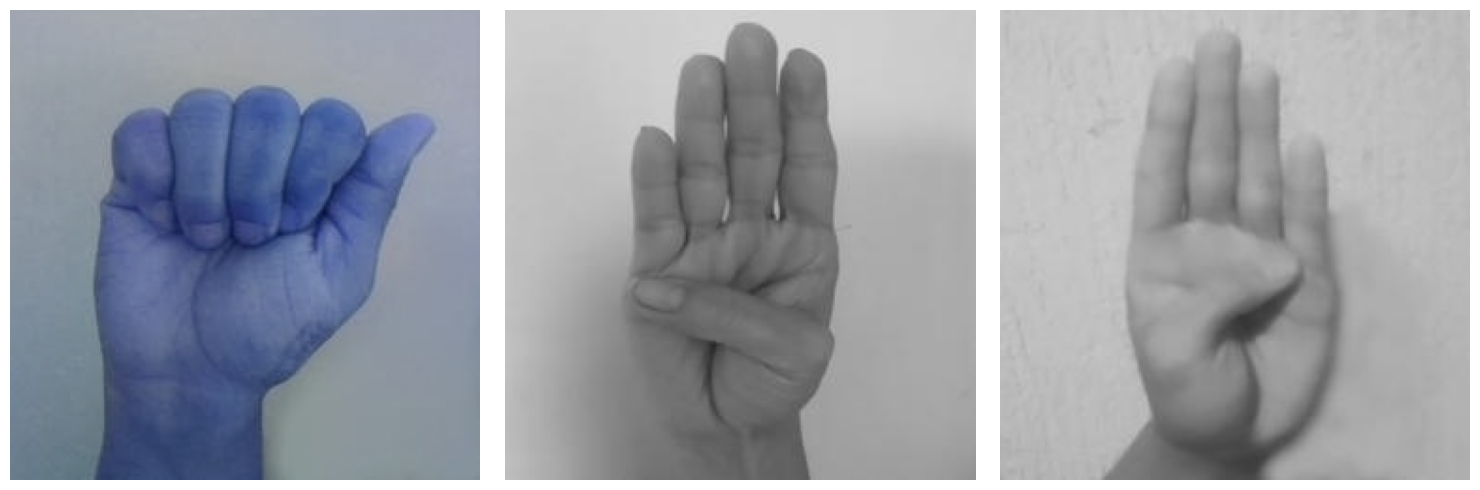

In [7]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display images in the subplots
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Colorize photos

Pass images to the image colorization pipeline.

In [8]:
result_1 = img_colorization(img1)
result_2 = img_colorization(img2)
result_3 = img_colorization(img3)

In [9]:
type(result_1[OutputKeys.OUTPUT_IMG])

numpy.ndarray

### Display colored photos

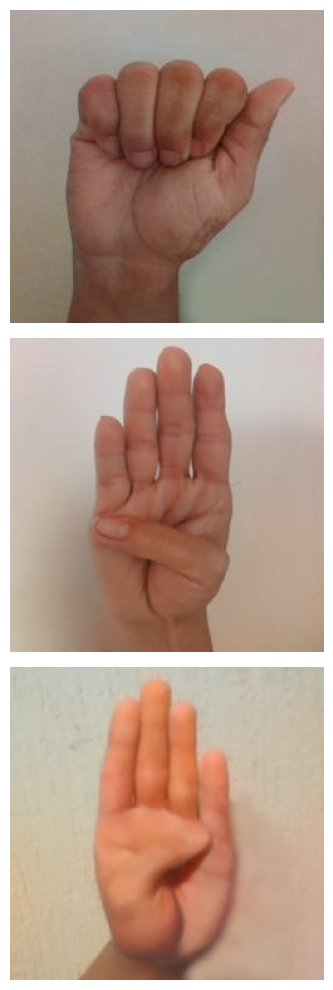

In [10]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Display images in the subplots
axes[0].imshow(cv2.cvtColor(result_1[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB))
axes[0].axis('off')  # Hide axes

axes[1].imshow(cv2.cvtColor(result_2[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB))
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(result_3[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB))
axes[2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

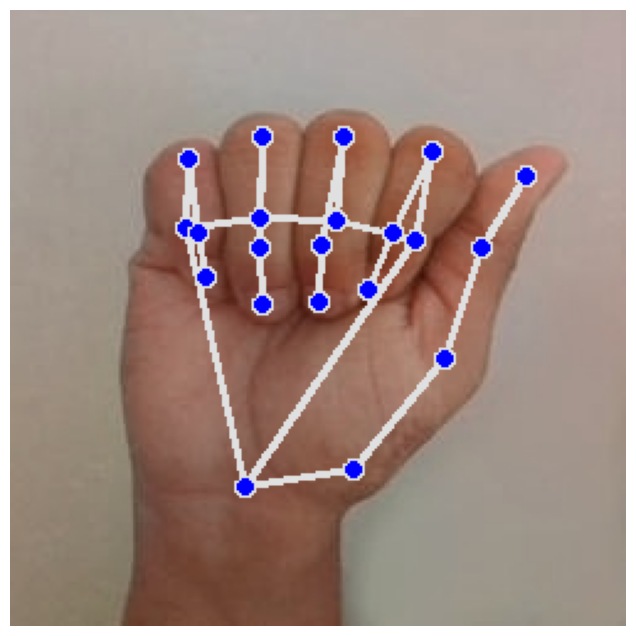

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt 

# Inicializa MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Carga la imagen
image_rgb = cv2.imread('../data_recolor/A/A1.jpg')
#image = result_1[OutputKeys.OUTPUT_IMG]
#image = img1
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Procesa la imagen para detectar manos
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    results = hands.process(image_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Dibuja los landmarks en la imagen
            mp_drawing.draw_landmarks(
                image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Imprime las coordenadas de los landmarks
            h, w, _ = image.shape
            for i, lm in enumerate(hand_landmarks.landmark):
                x, y = int(lm.x * w), int(lm.y * h)
                #print(f'Landmark {i}: ({x}, {y})')

# Muestra la imagen con los landmarks dibujados
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()